# Lecture 25 - K-Nearest Neighbors; Discriminant Functions

## K-Nearest Neighbors Classifier

Nearest neighbors methods compare a test point to the $k$ nearest training data points and then estimate an output value based on the desired/true output values of the $k$ nearest training points.

* Essentially, there is no "training" other than storing the training data points and their desired outputs

* In test, you need to: 
    1. Determine which $k$ neighbors in the training data are closest to the test point; and,
    2. Determine the output value for the test point.
    
In order to find the $k$ *nearest-neighbors* in the training data, you need to define a **similarity measure** or a **dissimilarity measure**. The most common dissimilarity measure is Euclidean distrance:

* Euclidean distance: $d_E(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{(\mathbf{x}_1 - \mathbf{x}_2)^T(\mathbf{x}_1 - \mathbf{x}_2)}$

* City-block distance: $d_{CB}(\mathbf{x}_1,\mathbf{x}_2) = \sum_{i=1}^n |\mathbf{x}_{1i} - \mathbf{x}_{2i}|$

* Mahalanobis distance: $d_M(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{(\mathbf{x}_1 - \mathbf{x}_2)^T\Sigma^{-1}(\mathbf{x}_1 - \mathbf{x}_2)}$

* Cosine angle similarity: $\cos(\theta) = \frac{\mathbf{x}_1^T \mathbf{x}_2}{\Vert\mathbf{x}_1\Vert_2^2 \Vert\mathbf{x}_2\Vert_2^2}$

* and many more.

If you are doing classification, once you find the $k$ nearest neighbors to your test point in the training data, then you can determine the class label of your test point using (most commonly) **majority vote**.

* If there are ties, they can be broken randomly or using schemes like applying the label to the closest data point in the neighborhood.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification, make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

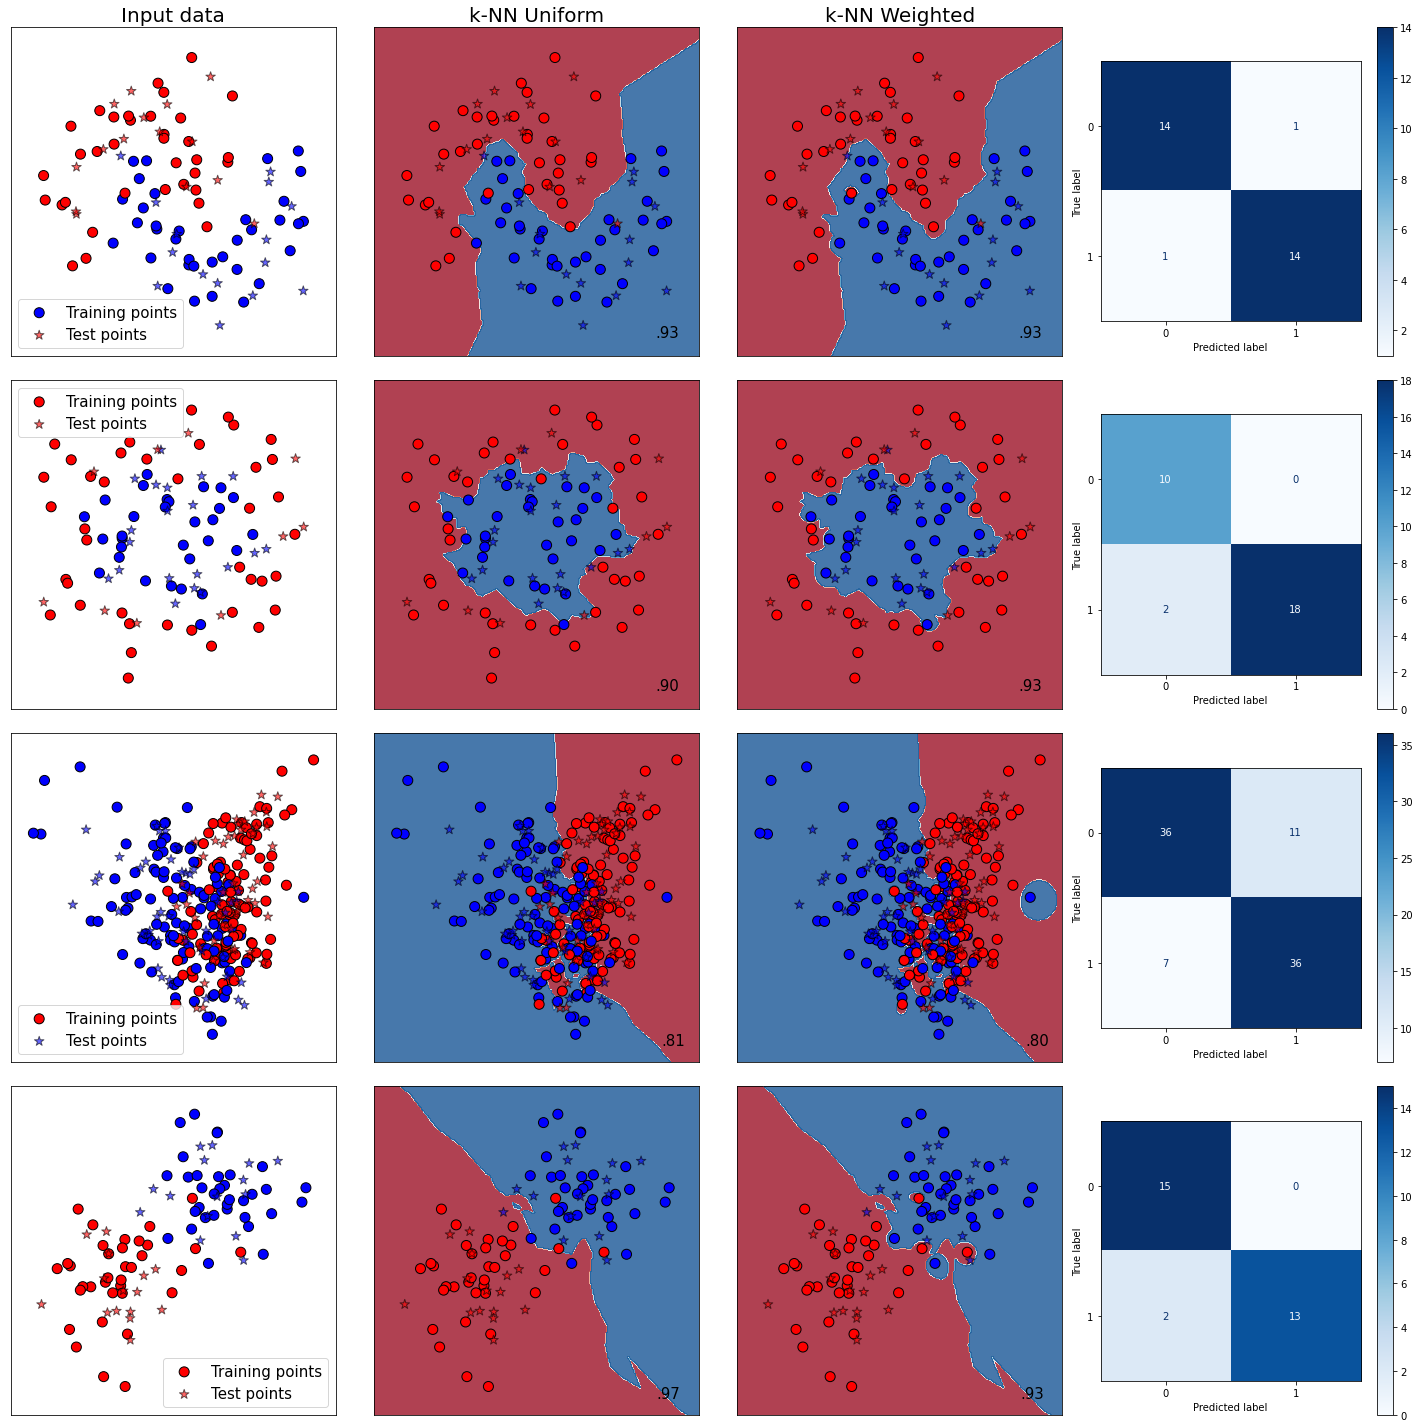

In [3]:
# Source: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

# figure parameters
h = .02  # step size in the mesh
figure = plt.figure(figsize=(20, 20))

# set up classifiers
n_neighbors = 3
classifiers = [KNeighborsClassifier(n_neighbors, weights='uniform'), \
               KNeighborsClassifier(n_neighbors, weights='distance')]
names = ['k-NN Uniform', 'k-NN Weighted']

# Put together Data Sets
n_samples = 300
X, y = make_classification(n_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable,
            make_blobs(centers=[[-1,-1],[2,1]])]
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title('Input data',size=20)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, s=100,
               edgecolors='k',label='Training points')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='*', s=100, c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k',label='Test points')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend(fontsize=15)
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary
#         Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, s=100,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='*', c=y_test, cmap=cm_bright, s=100,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        
        i += 1
    # Confusion Matrix
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    plot_confusion_matrix(clf, X_test, y_test, ax=ax, cmap='Blues')
    i += 1    

plt.tight_layout()
plt.show()

## Discussions

1. What happens when there are imbalanced classes?

2. Is k-NN sensitive to data scaling?